# import dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import dataset

In [2]:
df = pd.read_csv('./dataset/House Price Prediction Dataset.csv')
df.head(10)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
5,6,3944,1,2,1,1906,Urban,Poor,No,93262
6,7,3671,1,1,2,1948,Rural,Poor,Yes,448722
7,8,3419,2,4,1,1925,Suburban,Good,Yes,594893
8,9,630,2,2,1,1932,Rural,Poor,Yes,652878
9,10,2185,3,3,1,2000,Downtown,Poor,No,340375


In [3]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


- distribusi data tidak mengikuti normal distribution, terlihat pada mean dan stdnya
- nilai tiap kolom terlihat valid, tidak ada nilai negatif


# cleaning data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


- terdapat 8 feature dengan 1 target. 
- ada 3 categorical features
- tidak ada missing values

In [5]:
df.duplicated().sum()

np.int64(0)

tidak ada nilai duplikat

In [6]:
df_cleaned = df.drop(columns=['Id'])

In [7]:
# memisahkan numerical features dengan categorical features

num_features = df_cleaned.select_dtypes(include=['number'])

cat_features = df_cleaned.select_dtypes(include=['object'])
    

In [8]:
num_features.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
0,1360,5,4,3,1970,149919
1,4272,5,4,3,1958,424998
2,3592,2,2,3,1938,266746
3,966,4,2,2,1902,244020
4,4926,1,4,2,1975,636056


In [9]:
cat_features.head()

,Location,Condition,Garage
0,Downtown,Excellent,No
1,Downtown,Excellent,No
2,Downtown,Good,No
3,Suburban,Fair,Yes
4,Downtown,Fair,Yes


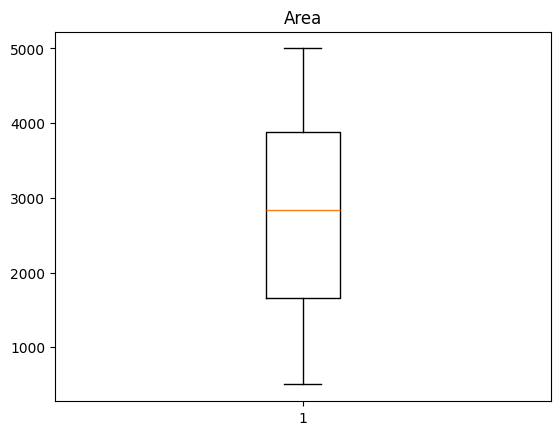

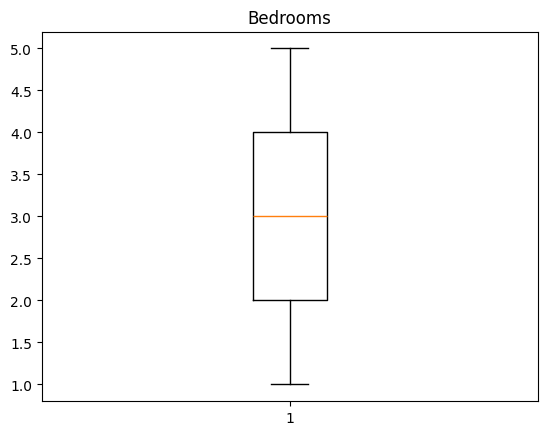

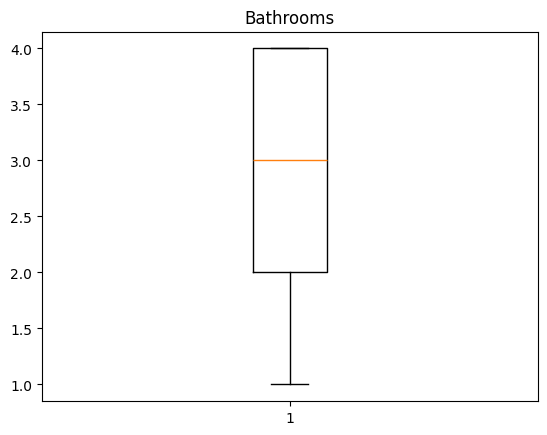

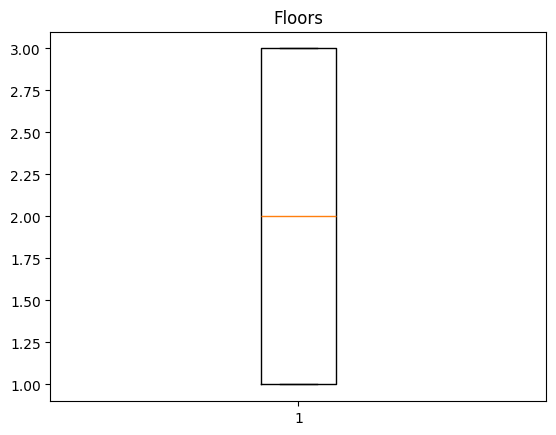

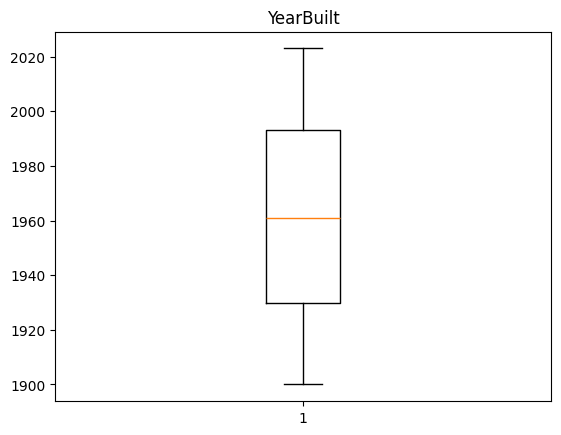

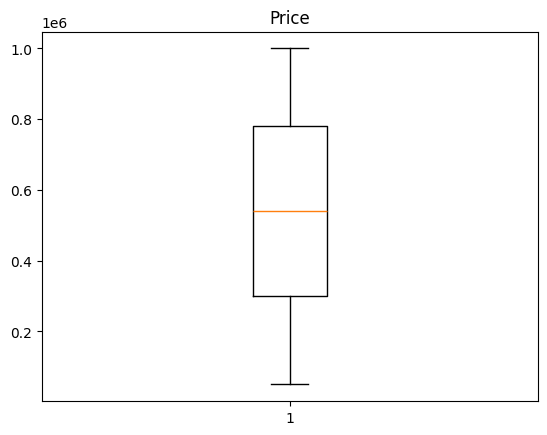

In [10]:
# mendeteksi outliers

columns = num_features.columns
for col in columns:
    plt.boxplot(num_features[col])
    plt.title(col)
    plt.show()



tidak ada outliers

dataset sudah bersih.
- tidak ada null values
- tidak ada data yang duplikat
- tidak ada outliers

# EDA

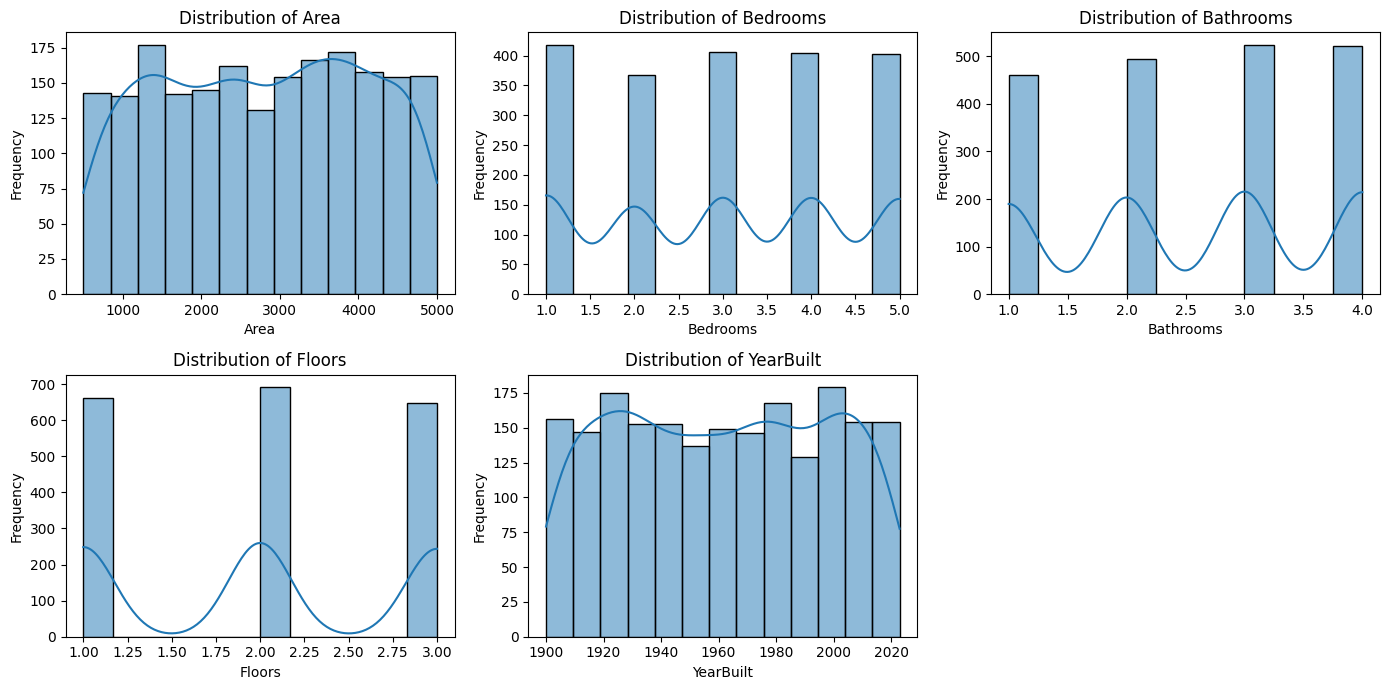

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(14, 7))
columns = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(num_features[col], kde=True, ax=axes[i])  # Histogram dengan KDE
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# menghapus subplot yang tidak digunakan 
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Menampilkan dan merapikan plot
plt.tight_layout()
plt.show()

dari distribusi di atas, data tidak mengikuti normal distribution

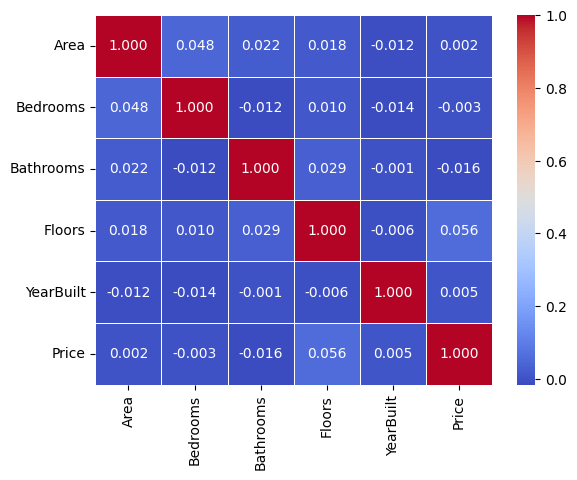

In [55]:
corr = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.3f', linewidths=0.5)
plt.show()


kolom numerik memiliki korelasi yang rendah antar feature

Index(['No', 'Yes'], dtype='object', name='Garage')

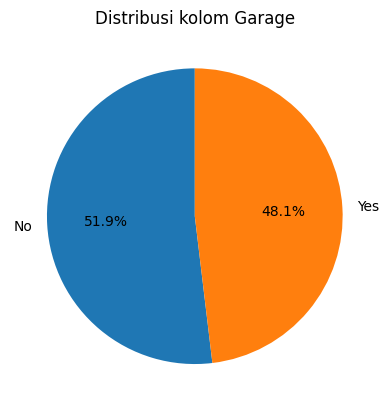

In [66]:
Garage = df_cleaned['Garage'].value_counts()
plt.pie(Garage, labels=Garage.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi kolom Garage')
plt.show()

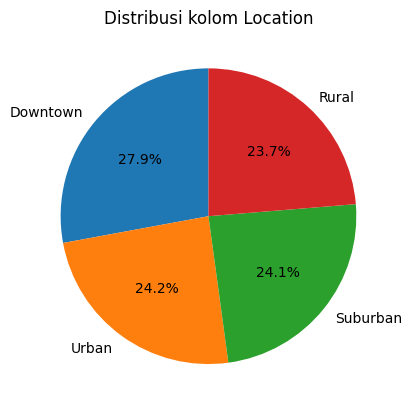

In [68]:
Location = df_cleaned['Location'].value_counts()
plt.pie(Location, labels=Location.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi kolom Location')
plt.show()

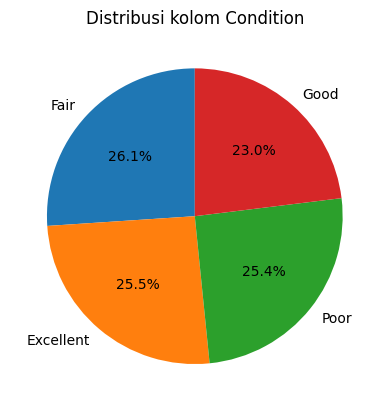

In [69]:
Condition = df_cleaned['Condition'].value_counts()
plt.pie(Condition, labels=Condition.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi kolom Condition')
plt.show()

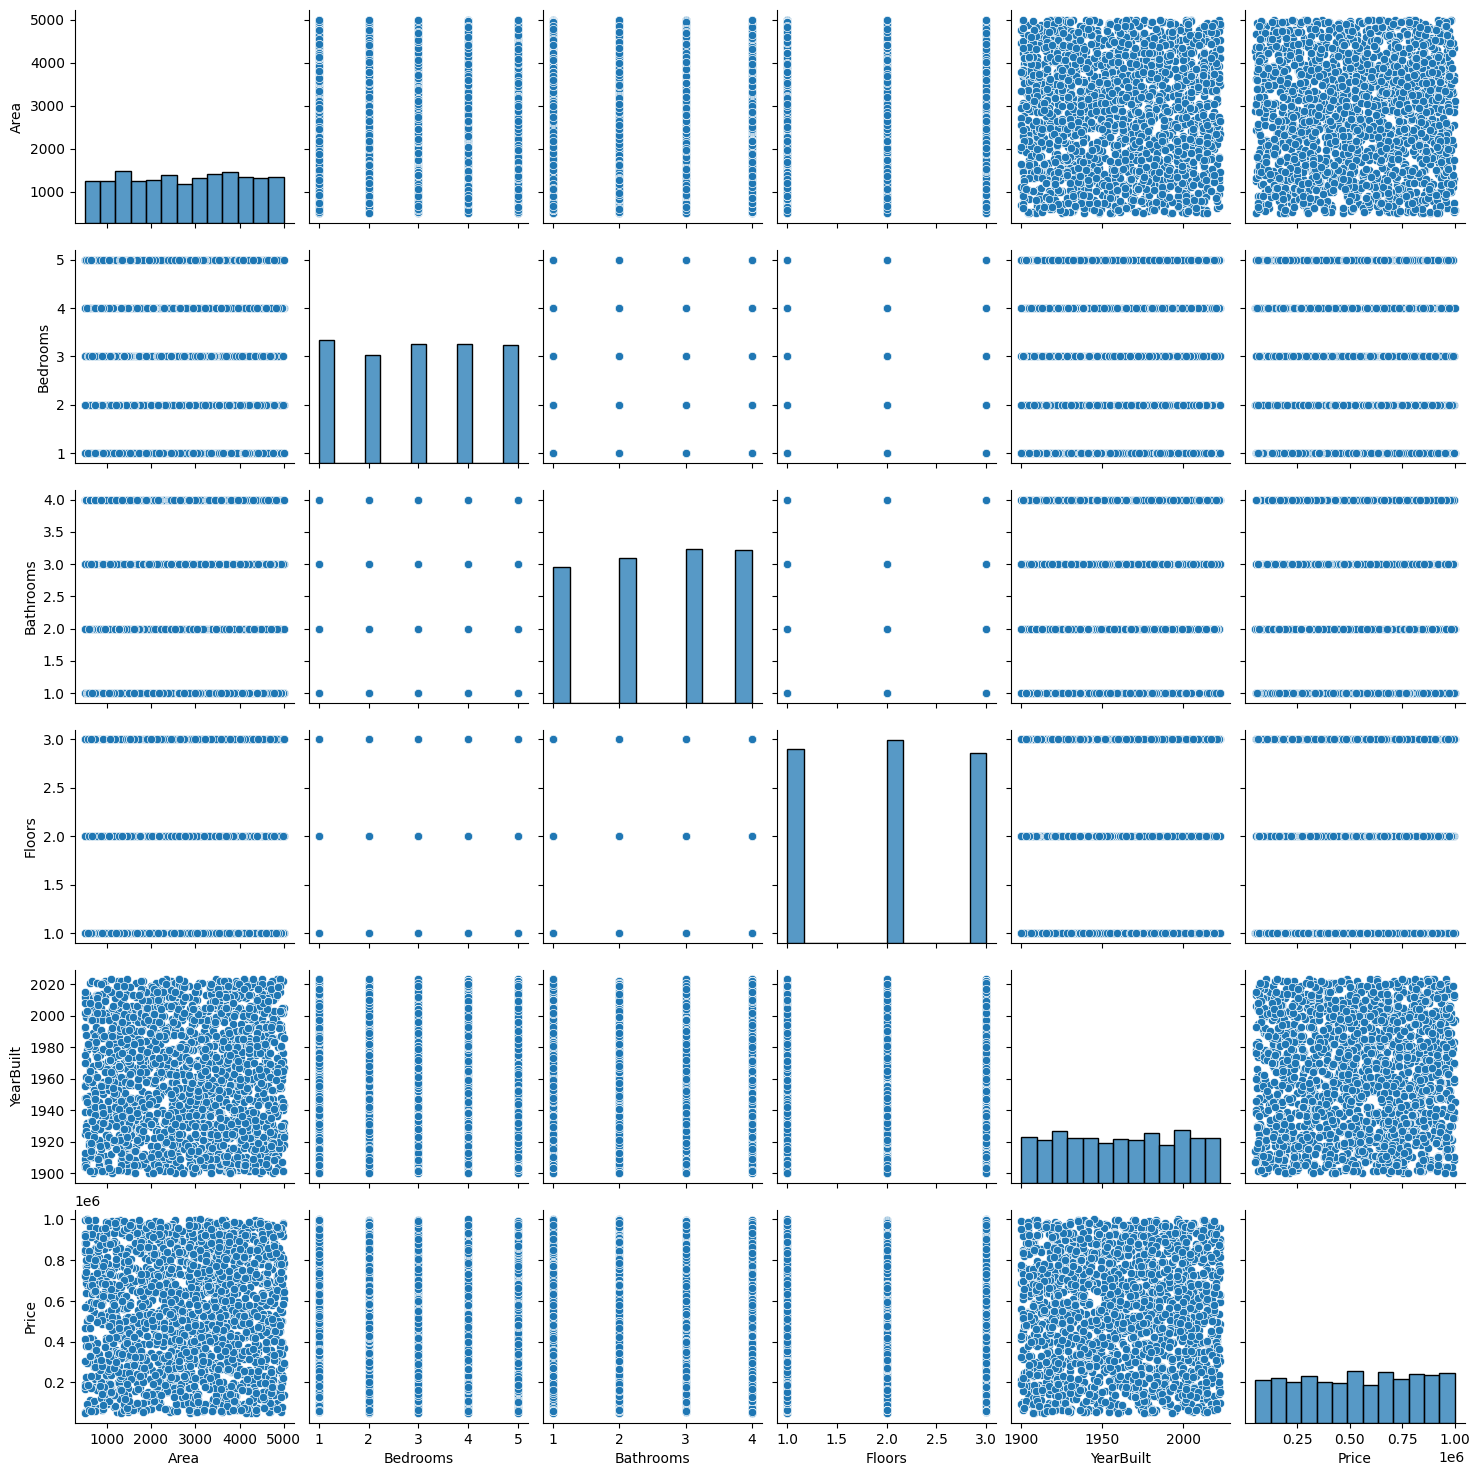

In [71]:
sns.pairplot(df_cleaned)
plt.show()

# Data Preprocessing

## encoding

In [12]:
cat_features.nunique()

Location     4
Condition    4
Garage       2
dtype: int64

mengecek jumlah kategori tiap kolom

In [13]:
for col in cat_features.columns :
    print(col)
    print(cat_features[col].unique())
    print()

Location
['Downtown' 'Suburban' 'Urban' 'Rural']

Condition
['Excellent' 'Good' 'Fair' 'Poor']

Garage
['No' 'Yes']



kolom ordinal : condition
- menggunakan ordinal encoder

kolom nominal : location dan garage, karena tidak memiliki urutan yang jelas dan universal, downtown tidak selalu lebih tinggi dari rural. rumah dengan garasi tidak selalu lebih tinggi dari rumah tanpa garasi
- menggunakan one hot encoding




In [14]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Excellent']])

cat_features['Condition_encoded'] = ordinal_encoder.fit_transform(cat_features[['Condition']])

In [15]:
df_encoded = pd.get_dummies(cat_features, columns=['Location', 'Garage'], drop_first=True)

df_encoded.head()



,Condition,Condition_encoded,Location_Rural,Location_Suburban,Location_Urban,Garage_Yes
0,Excellent,3.0,False,False,False,False
1,Excellent,3.0,False,False,False,False
2,Good,2.0,False,False,False,False
3,Fair,1.0,False,True,False,True
4,Fair,1.0,False,False,False,True


df_encoded berisi data yang telah diubah menggunakan one hot encoding

In [16]:
cat_features

,Location,Condition,Garage,Condition_encoded
0,Downtown,Excellent,No,3.0
1,Downtown,Excellent,No,3.0
2,Downtown,Good,No,2.0
3,Suburban,Fair,Yes,1.0
4,Downtown,Fair,Yes,1.0
...,...,...,...,...
1995,Suburban,Poor,No,0.0
1996,Suburban,Poor,Yes,0.0
1997,Rural,Poor,No,0.0
1998,Urban,Excellent,Yes,3.0


In [17]:
# menggabungkan num_features dengan kolom condition_encoded dan disimpan pada variable hp_df
hp_df = pd.merge(num_features, cat_features['Condition_encoded'], left_index=True, right_index=True)


In [18]:
# menggabungkan hp_df dengan df_encoded dan disimpan pada house_prices_df
house_prices_df = pd.merge(hp_df, df_encoded, left_index=True, right_index=True)

In [19]:
house_prices_df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Condition_encoded_x,Condition,Condition_encoded_y,Location_Rural,Location_Suburban,Location_Urban,Garage_Yes
0,1360,5,4,3,1970,149919,3.0,Excellent,3.0,False,False,False,False
1,4272,5,4,3,1958,424998,3.0,Excellent,3.0,False,False,False,False
2,3592,2,2,3,1938,266746,2.0,Good,2.0,False,False,False,False
3,966,4,2,2,1902,244020,1.0,Fair,1.0,False,True,False,True
4,4926,1,4,2,1975,636056,1.0,Fair,1.0,False,False,False,True


## scaling